# 2 Pendulums





## Purpose
Observe how two connected pendulums differ from just one pendulum

## Set up

- String length for both is 1m, separation is 15 cm and the string between them is 5 cm from the top of the pendulums 

## Observations
- If you pull one pendulum then the second one starts swinging as well but lags behind at first. Then eventually the second one starts swinging out of phase. This happens several times.
- The first pendulum transfer energy to the second one so that it also starts moving

## Changes
- lowering the connecting string to 22cm: initial ball eventually slows down and the second one starts swing at similar to the initial speed. After a similar amount of time the first one starts swinging again and the second slows down and actually comes to a stop. The first pendulum slows down but never stops whereas the second one stops periodically. It appears that most of energy of the fist pendulum is transfered to the second one and then all the energy is transferred back to the first pendulum as the second pendulum comes to a stop.
- Different angle of initial release: if a much larger angle is used, then the second pendulum takes more time to come to rest between the first and the second time. At the smaller angle is around 18 seconds whereas it takes over 25 seconds for this to happen if the angle is over 40 degrees. This may be due to the extra gravitational potential energy the second pendulum has due to it being slightly higher due to pull up from the string.

## Ideas
- Does the time period between the second pendulum's coming to rest depend on the angle of release?
- How does the time period depend on the height of the connecting string
- Does changing any part of the experiment result in the first pendulum also coming to rest


## First experiment formulation
Team: Michael Bell, Dominic Jeong



## Hypothesis
The initial angle of release does not affect the time needed for the second pendulum to stop for the second time


## Procedure
1. Set up the pendulums with the connecting string at 50 cm from the top
2. Measure angle of initial release at correct angles (10, 20 and 25) making sure that the string is taut
3. Set up timer on phone
4. Drop the ball
5. When second pendulum stop for the first time start timer on phone
6. Record raw data in table with headings
7. Repeat 3 times for each angle

## Table
| Angle (degrees) | Period (s) |
| -------------   | ------------- |
| 10              | 9.84  |

## Notice
The observations above are for a system with the second pendulum being of aluminium and the first one being of steel. This may explain why only the second pendulum came to rest. I will now replace the steel one with another aluminium one so their mass is not a variable. I will then proceed with the experiment and collect data

## Table
| Angle (degrees) | Period (s) |
| -------------   | ------------- |
| 10              | 10.87  |
|               | 9.92  |
|               | 10.02  |
|  20             |   |
|               |   |

## Observations
At 25 degrees the connecting string still pulls up on the second pendulum therefore we decided to only collect data for angles of 10 and 20 degrees.



## Purpose
Motion tracking of one of the pendulum out of a two pendulum system using a phone and motion tracking code template created as part of the video analysis tutorial.

## Hypothesis
The total energy of the two pendulum in the systewm stays the same and shifts from one pendulum to the other. The graph of first pendulum will be a sin wave times a sin wave.

## Set up
Same set up as last week.
Connecting string is 30 cm from the top.
First pendulum is wrapped up in white tissue.
The second pendulum is covered by a black bin which functions as black bacground for the first pendulum. 
The phone will be propped up on a stand on a chair and will be recording from the front facing camera at 720p 30fps.

## Video analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.cm as cm 
import imageio

#import video with name
file = 'IMG_0105 2.MOV'
vid = imageio.get_reader(file, format='FFMPEG')



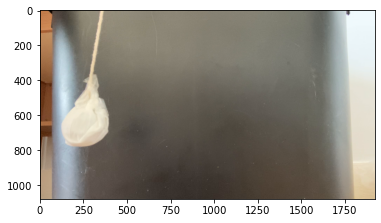

In [6]:
#seeing what a frame looks like
testframe= frame(150)
plot.imshow(testframe)

In [10]:
#Setting up functions for pendulum tracking from video

import numpy as np
import matplotlib.pyplot as plot
import matplotlib.cm as cm 
import imageio

#import video with name
file = 'IMG_0105 2.MOV'
vid = imageio.get_reader(file, format='FFMPEG')

def frame(mf):
    return vid.get_data(mf)

def fdiff(f):
    return f[:,:,0].astype(float)-f[:,:,1].astype(float)


def tresh(framedifference,compvalue):
    comp=framedifference>compvalue
    return framedifference*comp

def centm(tresholdedframe):
    summed_intensities=tresholdedframe.sum()
    positions = np.indices(tresholdedframe.shape)
    Rx = np.sum( positions[0]*tresholdedframe) 
    Ry = np.sum( positions[1]*tresholdedframe) 
    R = (Ry, Rx)/summed_intensities
    return R

def fpers(vid):
    fps_values = np.array([])
    for num, image in enumerate(vid.iter_data()):
        if num % int(vid._meta['fps']):
            continue
        else:
                    fps = vid.get_meta_data()['fps']
                    fps_values = np.append(fps_values, fps)
                    
    return fps

def totframe(start):
    count=start
    for myframe in vid.iter_data():
        count=count+1
    return count


In [11]:
#Motion tracking

a=fpers(vid)

c=0   #starting frame
b=totframe(c)-300   #total number of frames

#notice last few seconds not used for tracking as the phone was moved.

x=np.zeros(b-c) #array sizes of x 
y=np.zeros(b-c)#array sizes of y
t=np.zeros(b-c)#array sizes of t

for i in range(c,b):   #loop
    f=frame(i)
    treshold=tresh(f[:,50:1700],150)
    cem=centm(treshold)
    x[i]=cem[0]
    y[i]=cem[1]
    t[i]=i/a

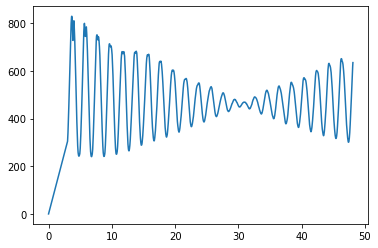

In [7]:
# First try at motion tracking with educated guess for threshold
%matplotlib inline
plot.plot(t,x)
plot.title("Trial 1 of motion tracking")

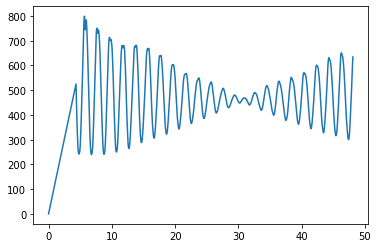

In [9]:
#try 2
%matplotlib inline
plot.plot(t,x)

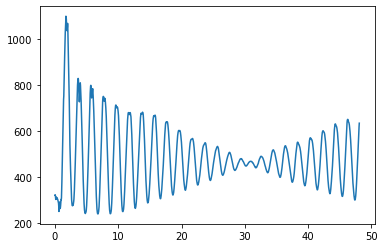

In [11]:
#try 3 
%matplotlib inline
plot.plot(t,x)

Text(23.875, 0.5, 'X position of the pendulum')

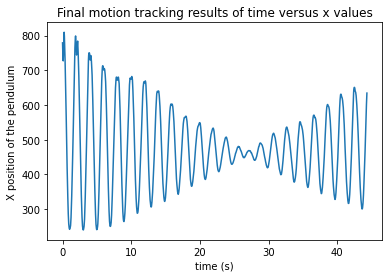

In [14]:
#final plot showing the correct motion tracking of the pendulum
%matplotlib inline
plot.plot(t,x)
plot.savefig("myplot21.png") 
plot.title("Final motion tracking results of time versus x values")
plot.xlabel("time (s)")
plot.ylabel("X position of the pendulum")

## Purpose
Creating a mathematical model that fits the tracked motion of the pendulum.

## Hypothesis
A good mathematical model is $$ x = A sin(Wt+Z) sin(Bt+C) +D $$

## Explaination
The model is thought after looking at the final plot from the last week's entry. We can see that internally the pendulum follows a sinusoidal curve the aplitude of which also seems to follow a sinusoidal shape. This is why I decided to go with sin times sin. A is the amplitude. sin(Wt+Z) rapresents the internal sin wave where W is its frequency and Z is the phase shift. sin(Bt+C) rapresents the sin wave of the amplitude where B is the frequency and C is the phase shift. D was added later to shift the graph up to match it with the data plot

In [15]:
#This is the function that will model my data, same as above
def model(A,W,Z,B,C,t,D):
    x=A*np.sin(W*t+Z)*np.sin(B*t+C)+D
    return x
    

In [16]:
times= np.linspace(0,44.7,450) #data points for the time

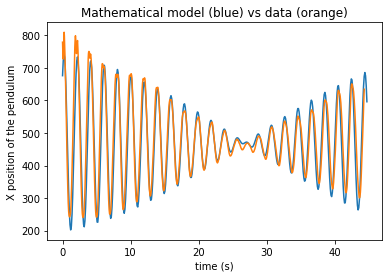

In [20]:
#trial and error for A, W, Z, B, C and D till I get the model to match the data
xvals=model(280,3.2,4,0.05,17.51,times,470)
plot.plot(times,xvals) #blue 
plot.plot(t,x) #orange
plot.title("Mathematical model (blue) vs data (orange)")
plot.xlabel("time (s)")
plot.ylabel("X position of the pendulum")
plot.show()

## Analysis
The model seems to fit the data really well. We can see that the peaks line up really well indicating that the frequencies are likely the same. The amplitude is very close in most cases however it does differ slighlty towards the end. This could indicate that an exponential decay factor could be at play. To test whether an exponential is needed in the model a longer sample of data is needed. To achive this the next step ought to be to record a longer video and motion track it and then iterate the mathematical model to fit the data collected. This will highlight if the amplitude decreases over time or not.